In [1]:
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt


OSError: could not find or load spatialindex_c-64.dll

In [4]:
fp = "../doc/GISData/RPG_2-0_SHP_LAMB93_R28_2020/PARCELLES_GRAPHIQUES.shp"
data = gpd.read_file(fp)

In [5]:
fp = "../doc/GISData/contour-des-departements.geojson"
dep = gpd.read_file(fp)

dep.head()

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.03424 46.79080, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ..."


In [6]:
counts = data.groupby(by="CODE_CULTU")["SURF_PARC"].sum()
print(counts.sort_values(ascending=False))
counts.sort_values(ascending=False).to_csv("../ress/count.csv")

CODE_CULTU
PPH    602282.15
BTH    419293.26
MIE    236451.92
CZH    120878.26
ORH    101681.26
         ...    
PVP         0.07
TOT         0.05
OSE         0.04
BAS         0.03
CCN         0.02
Name: SURF_PARC, Length: 182, dtype: float64


On voit donc qu'on à énormément de cultures avec de nombreuses prairies et jachères inexploitées. (CF ress/count pour avoir plus d'informations)

In [7]:
grilleRPGdf=pd.DataFrame(index=data["CODE_CULTU"].unique(),columns=["SBSTCROP"])
grilleRPGdf["SBSTCROP"]="0"
BD=["BDH","BDP","BDT"]
for l in BD:
    grilleRPGdf.at[l,"SBSTCROP"]="Ble.dur"
BT=["BTH","BTP"]
for l in BT:
    grilleRPGdf.at[l,"SBSTCROP"]="Ble.tendre"
M=["MIS","MID"]
for l in M:
    grilleRPGdf.at[l,"SBSTCROP"]="Mais.grain"
ME=["MIE"]
for l in ME:
    grilleRPGdf.at[l,"SBSTCROP"]="Mais.ensilage"
A=["AVH","AVP","CHA","CPA"]
for l in A:
    grilleRPGdf.at[l,"SBSTCROP"]="Avoin"
S=["CHS","CPS","SGH","SGP"]
for l in S:
    grilleRPGdf.at[l,"SBSTCROP"]="Seigle"
SO=["CGO","SOG"]
for l in SO:
    grilleRPGdf.at[l,"SBSTCROP"]="Sorgho"
T=["CHT","CPT","TTH","TTP"]
for l in T:
    grilleRPGdf.at[l,"SBSTCROP"]="Triticale"
C=["CZH","CZP"]
for l in C:
    grilleRPGdf.at[l,"SBSTCROP"]="Colza"
TOUR=["TRN"]
for l in TOUR:
    grilleRPGdf.at[l,"SBSTCROP"]="Tournesol"
SOJ=["SOJ"]
for l in SOJ:
    grilleRPGdf.at[l,"SBSTCROP"]="Soja"
POI=["PPO","PHI","PPR","PPT"]
for l in POI:
    grilleRPGdf.at[l,"SBSTCROP"]="Pois"
PPR=["FEV","FVL","FVT","MPC","MPP","PAG"]
for l in PPR:
    grilleRPGdf.at[l,"SBSTCROP"]="Pois.proteagineux"
PDT=["PTC","PTF","TOP"]
for l in PDT:
    grilleRPGdf.at[l,"SBSTCROP"]="Pomme.de.terre"
BET=["BTN","BVF"]
for l in BET:
    grilleRPGdf.at[l,"SBSTCROP"]="Betterave"
grilleRPGdf.at["ORH","SBSTCROP"]="Orge.hiver"
grilleRPGdf.at["ORP","SBSTCROP"]="Orge.de.printemps"
grilleRPGdf.at[l,"SBSTCROP"]="Betterave"

grilleRPGdf.to_csv("../ress/grilleRPGdf.csv")

In [8]:
for i in data.index:
    data.at[i,"CULT"]=grilleRPGdf.at[data.at[i,"CODE_CULTU"],"SBSTCROP"]

data.head()

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry,CULT
0,11617797,5.81,BTH,1,DPH,DTR,"POLYGON ((552342.224 6885646.718, 552236.269 6...",Ble.tendre
1,11617798,5.42,BTH,1,DPH,DTR,"POLYGON ((552872.693 6885348.890, 552868.790 6...",Ble.tendre
2,11617800,10.43,LIF,9,None,None,"POLYGON ((552507.710 6885684.610, 552505.912 6...",0
3,14062613,11.99,ORP,3,None,None,"POLYGON ((552790.446 6885775.460, 552644.924 6...",Orge.de.printemps
4,14062611,8.30,BTH,1,None,None,"POLYGON ((552692.112 6885576.233, 552685.947 6...",Ble.tendre


In [9]:
renddf=pd.read_csv("../ress/rend.csv",index_col=[0],header=[0,1],encoding="latin_1")
special_crop_list=["Pois","Pois.proteagineux"]

for i in data.index:
    c=data.at[i,"CULT"]
    if c=="Orge.de.printemps" or c=="Orge.hiver":
        data.at[i,"PROD"]=data.at[i,"SURF_PARC"]*(renddf.at["01",("Orge","2010")]/10)
    elif c in special_crop_list:
        data.at[i,"PROD"]=data.at[i,"SURF_PARC"]*(45/100)
    elif c!="0" and c not in special_crop_list:
        data.at[i,"PROD"]=data.at[i,"SURF_PARC"]*(renddf.at["01",(c,"2010")]/10)
    else :
        data.at[i,"PROD"]=0

In [10]:
data.head()

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry,CULT,PROD
0,11617797,5.81,BTH,1,DPH,DTR,"POLYGON ((552342.224 6885646.718, 552236.269 6...",Ble.tendre,39.233450
1,11617798,5.42,BTH,1,DPH,DTR,"POLYGON ((552872.693 6885348.890, 552868.790 6...",Ble.tendre,36.599879
2,11617800,10.43,LIF,9,None,None,"POLYGON ((552507.710 6885684.610, 552505.912 6...",0,0.000000
3,14062613,11.99,ORP,3,None,None,"POLYGON ((552790.446 6885775.460, 552644.924 6...",Orge.de.printemps,72.643099
4,14062611,8.30,BTH,1,None,None,"POLYGON ((552692.112 6885576.233, 552685.947 6...",Ble.tendre,56.047785


In [11]:
counts = data.groupby(by="CULT")["SURF_PARC"].sum()
print(counts.sort_values(ascending=False))

CULT
0                    896846.00
Ble.tendre           423779.07
Mais.ensilage        236451.92
Colza                121042.07
Orge.hiver           101681.26
Mais.grain            44804.27
Betterave             31608.93
Orge.de.printemps     29748.71
Pomme.de.terre        20343.81
Pois                  11317.33
Pois.proteagineux     10122.71
Avoin                  9024.57
Triticale              5731.78
Tournesol              1966.22
Ble.dur                1079.61
Sorgho                  978.31
Seigle                  614.14
Soja                    283.04
Name: SURF_PARC, dtype: float64


In [12]:
cropCIMSEhiver=["Orge.de.printemps","Ble.tendre","Sorgho","Pois","Betterave","Mais.grain","Mais.ensilage","Soja","Pomme.de.terre"]
cropCIMSEete=["Orge.hiver"]
rendCIMSEdf=pd.read_csv("../ress/rendcimse.csv",index_col=[0],header=[0,1,2],encoding="latin_1")
for i in data.index:
    if data.at[i,"CULT"]in cropCIMSEete:
        data.at[i,"ProdCIMSE"]=data.at[i,"SURF_PARC"]*rendCIMSEdf.at["72",("RdRecolte","Ete","2010")]
    elif data.at[i,"CULT"]in cropCIMSEhiver:
        data.at[i,"ProdCIMSE"]=data.at[i,"SURF_PARC"]*rendCIMSEdf.at["72",("RdRecolte","Hiver","2010")]
    else :
        data.at[i,"ProdCIMSE"]=0



In [13]:
tauxresdf=pd.read_csv("../ress/tauxres.csv",index_col=[0],header=[0],encoding="latin_1")
for i in data.index:
    c=data.at[i,"CULT"]
    if c!="0":
        if c == "Orge.hiver":
            data.at[i,"RESIDUS"]=data.at[i,"PROD"]*tauxresdf.at["TOT","Orge.d.hiver.et.escourgeon"]
        else :
            data.at[i,"RESIDUS"]=data.at[i,"PROD"]*tauxresdf.at["TOT",c]
    else:
        data.at[i,"RESIDUS"]=0

In [14]:
data.head()

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry,CULT,PROD,ProdCIMSE,RESIDUS
0,11617797,5.81,BTH,1,DPH,DTR,"POLYGON ((552342.224 6885646.718, 552236.269 6...",Ble.tendre,39.233450,12.8982,24.500889
1,11617798,5.42,BTH,1,DPH,DTR,"POLYGON ((552872.693 6885348.890, 552868.790 6...",Ble.tendre,36.599879,12.0324,22.856251
2,11617800,10.43,LIF,9,None,None,"POLYGON ((552507.710 6885684.610, 552505.912 6...",0,0.000000,0.0000,0.000000
3,14062613,11.99,ORP,3,None,None,"POLYGON ((552790.446 6885775.460, 552644.924 6...",Orge.de.printemps,72.643099,26.6178,22.546773
4,14062611,8.30,BTH,1,None,None,"POLYGON ((552692.112 6885576.233, 552685.947 6...",Ble.tendre,56.047785,18.4260,35.001270


In [15]:
methdf=pd.read_csv("../ress/methanogene.csv",index_col=[0],header=[0],encoding="latin_1")
cbg=11.04 ##Capacité calorifique en kWh/m^3

for i in data.index:
    c=data.at[i,"CULT"]
    if c!="0":
        if c== "Orge.hiver":
            data.at[i,"PRODBG"]=(data.at[i,"RESIDUS"]*methdf.at["PM","Orge.d.hiver.et.escourgeon"]+data.at[i,"ProdCIMSE"]*methdf.at["PM","CIMSE"])*cbg
        else:
            data.at[i,"PRODBG"]=(data.at[i,"RESIDUS"]*methdf.at["PM",c]+data.at[i,"ProdCIMSE"]*methdf.at["PM","CIMSE"])*cbg
    else:
        data.at[i,"PRODBG"]=0

In [16]:
data.head()

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry,CULT,PROD,ProdCIMSE,RESIDUS,PRODBG
0,11617797,5.81,BTH,1,DPH,DTR,"POLYGON ((552342.224 6885646.718, 552236.269 6...",Ble.tendre,39.233450,12.8982,24.500889,92443.544009
1,11617798,5.42,BTH,1,DPH,DTR,"POLYGON ((552872.693 6885348.890, 552868.790 6...",Ble.tendre,36.599879,12.0324,22.856251,86238.211450
2,11617800,10.43,LIF,9,None,None,"POLYGON ((552507.710 6885684.610, 552505.912 6...",0,0.000000,0.0000,0.000000,0.000000
3,14062613,11.99,ORP,3,None,None,"POLYGON ((552790.446 6885775.460, 552644.924 6...",Orge.de.printemps,72.643099,26.6178,22.546773,120565.609188
4,14062611,8.30,BTH,1,None,None,"POLYGON ((552692.112 6885576.233, 552685.947 6...",Ble.tendre,56.047785,18.4260,35.001270,132062.205727


Text(0.5, 1.0, 'Production de biogaz')

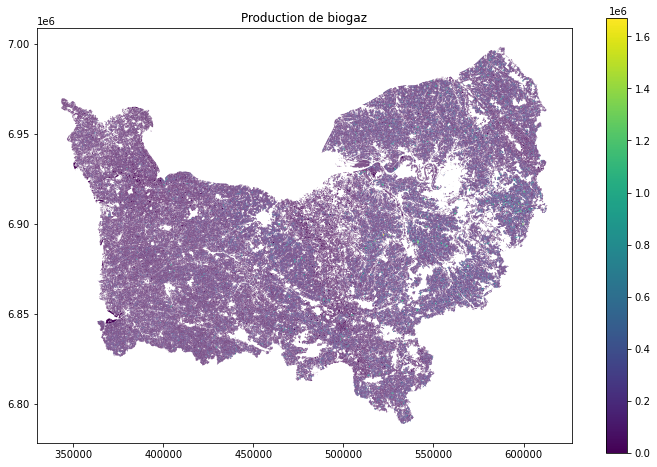

In [17]:
data.plot('PRODBG', legend=True,figsize=(12,8))
plt.title('Production de biogaz')

In [19]:
import sys
!conda install --yes --prefix {sys.prefix} folium
!conda install --yes --prefix {sys.prefix} branca
!conda install --yes --prefix {sys.prefix} pyproj


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - folium

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - branca

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Solving environment: ...working... done

# All requested packages already installed.



In [ ]:

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=data["geometry"],
    name="choropleth",
    data=data,
    columns=["ID_PARCEL", "PRODBG"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

RuntimeError: b'no arguments in initialization list'

NameError: name 'pyproj' is not defined

In [37]:
data.explore()

AttributeError: 'GeoDataFrame' object has no attribute 'explore'